In [1]:
import networkx as nx
import matplotlib.pyplot as plt

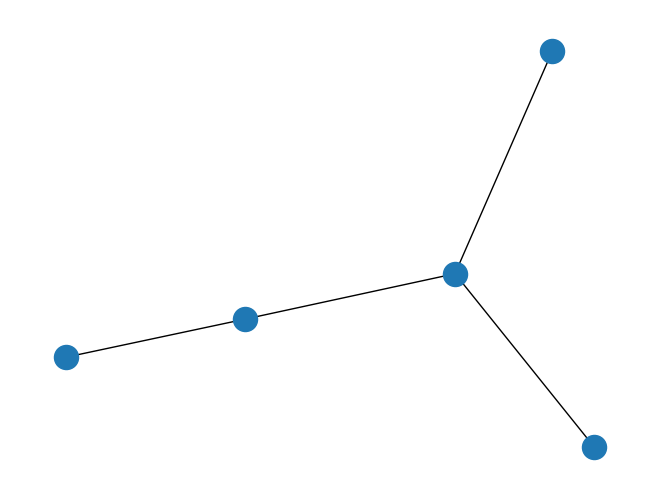

In [3]:
# 创建一个图
g = nx.Graph()
# 添加图的节点
g.add_node(2)
g.add_node(5)
# 添加图的边
g.add_edge(2, 5)
g.add_edge(1, 4)  # 当添加的边对应的节点不存在的时候，会自动创建相应的节点
g.add_edge(1, 2)
g.add_edge(2, 6)
# 绘制图
nx.draw(g)

In [4]:
# 默认情况下，networkX 创建的是无向图
G = nx.Graph()
print(G.is_directed())

# 创建有向图
H = nx.DiGraph()
print(H.is_directed())

False
True


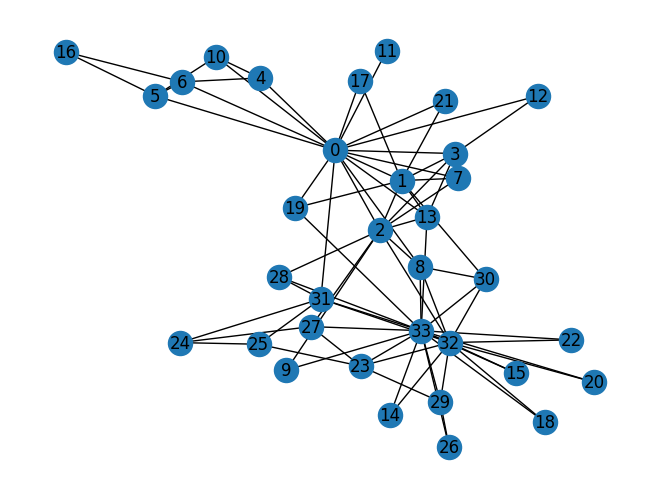

In [5]:
# 创建一个空手道俱乐部网络
G = nx.karate_club_graph()
# G is an undirected graph
type(G)
# 可视化图
nx.draw(G, with_labels=True)

In [6]:
# 网络平均度的计算
def average_degree(num_edges, num_nodes):
    # this function takes number of edges and number of nodes
    # returns the average node degree of the graph.
    # Round the result to nearest integer (for example 3.3 will be rounded to 3 and 3.7 will be rounded to 4)
    avg_degree = 0
    #########################################
    avg_degree = 2 * num_edges / num_nodes
    avg_degree = int(round(avg_degree))
    #########################################
    return avg_degree


num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


In [7]:
def average_clustering_coefficient(G):
    # this function that takes a nx.Graph
    # and returns the average clustering coefficient.
    # Round the result to 2 decimal places (for example 3.333 will be rounded to 3.33 and 3.7571 will be rounded to 3.76)
    avg_cluster_coef = 0
    #########################################
    ## Note:
    ## 1: Please use the appropriate NetworkX clustering function
    avg_cluster_coef = nx.average_clustering(G)
    avg_cluster_coef = round(avg_cluster_coef, 2)
    #########################################
    return avg_cluster_coef


avg_cluster_coef = average_clustering_coefficient(G)
print(
    "Average clustering coefficient of karate club network is {}".format(
        avg_cluster_coef
    )
)

Average clustering coefficient of karate club network is 0.57


In [10]:
def closeness_centrality(G, node=5):
    # the function that calculates closeness centrality
    # for a node in karate club network. G is the input karate club
    # network and node is the node id in the graph. Please round the
    # closeness centrality result to 2 decimal places.

    closeness = 0
    #########################################
    # Raw version following above equation
    # source: https://stackoverflow.com/questions/31764515/find-all-nodes-connected-to-n
    path_length_total = 0
    for path in list(nx.single_source_shortest_path(G, node).values())[1:]:
        path_length_total += len(path) - 1

    closeness = 1 / path_length_total
    closeness = round(closeness, 2)

    return closeness


node = 5
closeness = closeness_centrality(G, node=node)
print("The karate club network has closeness centrality (raw) {:.2f}".format(closeness))

The karate club network has closeness centrality (raw) 0.01


In [11]:
# Normalized version from NetworkX
# Notice that networkx closeness centrality returns the normalized
# closeness directly, which is different from the raw (unnormalized)
# one that we learned in the lecture.
closeness = nx.closeness_centrality(G, node)
print(
    "The karate club network has closeness centrality (normalzied) {:.2f}".format(
        closeness
    )
)

The karate club network has closeness centrality (normalzied) 0.38


In [13]:
# 创建一个二分图 Bipartite Graph
from networkx.algorithms import bipartite
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])
